## 例 3-1 计算 n -gram

In [8]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Load the first 10,000 reviews
# 加载前10 000条点评
f = open('data/yelp_dataset/review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 9)

In [21]:
review_df.iloc[1000]

business_id                               039QG6ks4UYNkMA3mcII2A
cool                                                           0
date                                         2012-05-28 16:42:56
funny                                                          0
review_id                                 qVBtM3H5xFUMweX1qGsOnA
stars                                                          5
text           My boyfriend and I were really looking forward...
useful                                                         8
user_id                                   sThIuQa4EE8WocfxVFWMlA
Name: 1000, dtype: object

In [5]:
review_df['text'][0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [6]:
# 创建一元词、二元词和三元词的特征转换器。 
# 默认情况下，会忽略单字母词，这非常有实际意义， 
# 因为会除去无意义的词。但在这个例子中， 
# 出于演示的目的，我们会显式地包含这些词。

In [11]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')

In [10]:
bow_converter

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [12]:
bigram_converter

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [13]:
trigram_converter

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(3, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [14]:
# 拟合转换器，查看词汇表大小
bow_converter.fit(review_df['text'])
words = bow_converter.get_feature_names()
bigram_converter.fit(review_df['text'])
bigrams = bigram_converter.get_feature_names()
trigram_converter.fit(review_df['text'])
trigrams = trigram_converter.get_feature_names()
print(len(words), len(bigrams), len(trigrams))

26290 316034 738062


In [15]:
# 看一下n-gram
words[:10]

['0', '00', '000', '00am', '00pm', '01', '01pm', '02', '025', '03']

In [26]:
bigrams[1001: 1010]

['11th floor',
 '12 0',
 '12 00',
 '12 000',
 '12 00pm',
 '12 01',
 '12 1',
 '12 10',
 '12 100']

In [27]:
trigrams[:10]

['0 1 0',
 '0 1 dessert',
 '0 1 good',
 '0 1 it',
 '0 1 prices',
 '0 1 speed',
 '0 10 mbps',
 '0 2 decor',
 '0 2 even',
 '0 2 it']

In [28]:
x = bow_converter.fit_transform(review_df['text'])
x

<10000x26290 sparse matrix of type '<class 'numpy.int64'>'
	with 723114 stored elements in Compressed Sparse Row format>

In [29]:
x2 = bigram_converter.fit_transform(review_df['text'])
x2

<10000x316034 sparse matrix of type '<class 'numpy.int64'>'
	with 1038605 stored elements in Compressed Sparse Row format>

In [30]:
x3 = trigram_converter.fit_transform(review_df['text'])
x3

<10000x738062 sparse matrix of type '<class 'numpy.int64'>'
	with 1070124 stored elements in Compressed Sparse Row format>

In [26]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

847545

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


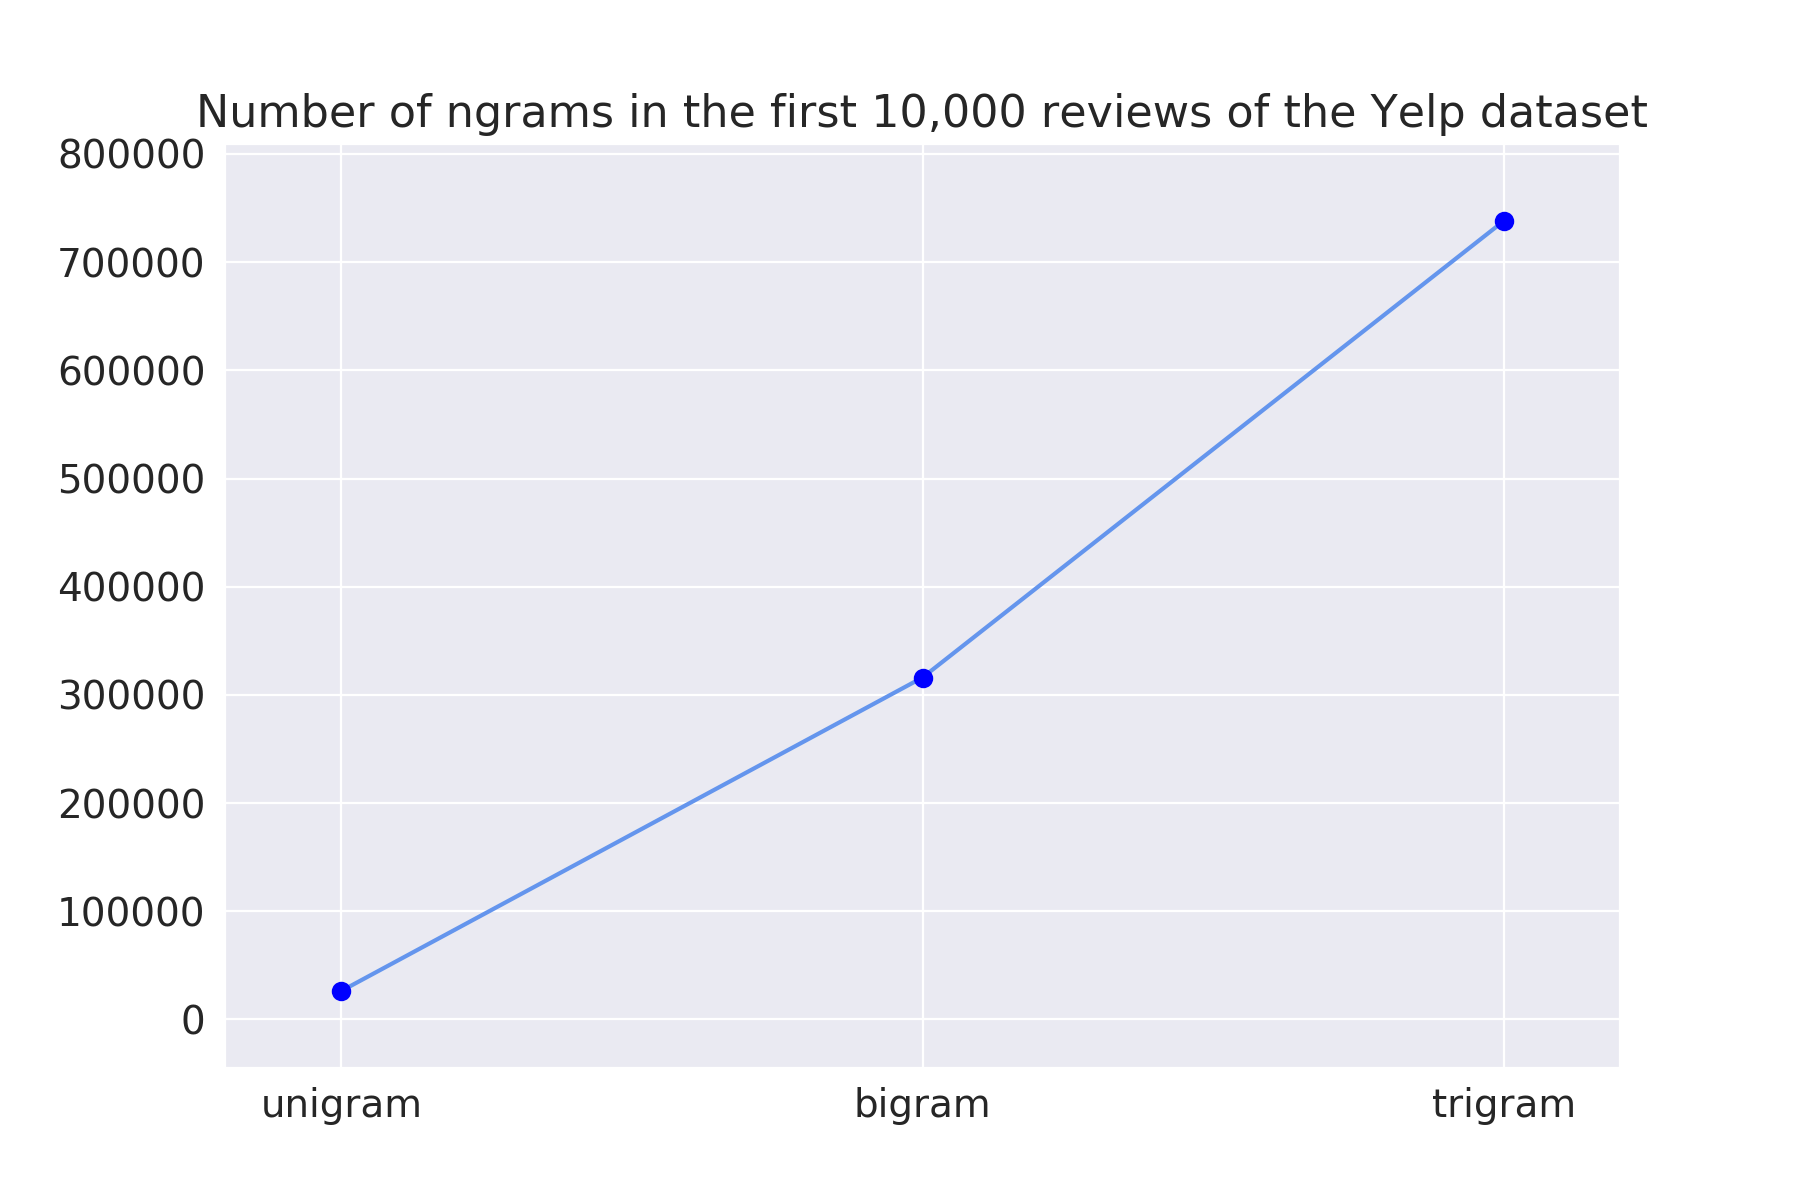

In [51]:
plt.figure(figsize=(9, 6))
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {
          'fontsize': 16})
plt.show()